In [18]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [19]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("charts_data_model_2.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
#df = df.dropna()
df.head()
df.shape

(1778996, 53)

In [3]:
df.count()

ID                       1778996
Severity                 1778996
Start_Time               1778996
End_Time                 1778996
Start_Lat                1778996
Start_Lng                1778996
Distance(mi)             1778996
Description              1778996
Street                   1778996
Side                     1778996
City                     1778996
County                   1778996
State                    1778996
Zipcode                  1778996
Country                  1778996
Timezone                 1778996
Airport_Code             1778996
Weather_Timestamp        1778996
Temperature(F)           1778996
Humidity(%)              1778996
Pressure(in)             1778996
Visibility(mi)           1778996
Wind_Direction           1778996
Wind_Speed(mph)          1778996
Weather_Condition        1778996
Amenity                  1778996
Bump                     1778996
Crossing                 1778996
Give_Way                 1778996
Junction                 1778996
No_Exit   

In [4]:
df.columns
#df.to_csv("clean_data.csv",index=False)

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'diff_minutes', 'diff_hours', 'datehour', 'dateminute', 'datemonth',
       'Season', 'TimeOfDay', 'State_Long', 'Region', 'Division',
       'Climate_Region'],
      dtype='object')

In [5]:
#remove columns with the least amount of information
df1=df.drop(["Airport_Code", "Weather_Timestamp", "ID", "Description","End_Time", "Distance(mi)", "Country", "City", 
             "Timezone", "Civil_Twilight","Nautical_Twilight","Astronomical_Twilight", "Street", "Start_Time", 
             "Start_Lat", "Start_Lng", "Wind_Direction", "State_Long", "Region", "Division",
            "diff_minutes", "diff_hours", "datehour", "dateminute", "datemonth"], axis=1)



In [6]:
df1.columns

Index(['Severity', 'Side', 'County', 'State', 'Zipcode', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Season', 'TimeOfDay', 'Climate_Region'],
      dtype='object')

In [7]:
df1.head()
#df1.to_csv("relevant_data.csv",index=False)

,Severity,Side,County,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Season,TimeOfDay,Climate_Region
0,2,R,Clermont,OH,45176,36.0,100.0,29.67,10.0,3.5,...,False,False,False,False,True,False,Night,Winter,Morning Rush,Central
1,3,R,Montgomery,OH,45417,35.1,96.0,29.64,9.0,4.6,...,False,False,False,False,False,False,Night,Winter,Morning Rush,Central
2,2,R,Montgomery,OH,45459,36.0,89.0,29.65,6.0,3.5,...,False,False,False,False,True,False,Day,Winter,Morning Rush,Central
3,3,R,Franklin,OH,43081,37.9,97.0,29.63,7.0,3.5,...,False,False,False,False,False,False,Day,Winter,Morning Rush,Central
4,2,R,Montgomery,OH,45417-2476,34.0,100.0,29.66,7.0,3.5,...,False,False,False,False,False,False,Day,Winter,Morning Rush,Central


In [8]:
#list(df.columns) 
#df1.dtypes

# Select your features (columns)

In [19]:
# Set features. This will also be used as your x values.
X = df1.drop(["Severity","Bump", "Turning_Loop","Sunrise_Sunset", "No_Exit", "Zipcode", "County"],axis=1)


#"Give_Way","Traffic_Calming","Roundabout","State"

#removing features did not result in a better score

# Select Y


In [20]:
y = df1["Severity"].values.reshape(-1, 1)

df1["Severity"].unique()

array([2, 3, 1, 4, 0])

In [21]:
print(X.shape, y.shape)


(1778996, 21) (1778996, 1)


### Dummy Encoding (Binary Encoded Data)

In [22]:
data = X.copy()
X = pd.get_dummies(data)

#X.to_csv("X.csv",index=False)
X.head()

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Crossing,Give_Way,Junction,Railway,...,Climate_Region_Central,Climate_Region_Midwest,Climate_Region_North Central,Climate_Region_Northeast,Climate_Region_Northwest,Climate_Region_South,Climate_Region_South East,Climate_Region_Southeast,Climate_Region_Southwest,Climate_Region_West
0,36.0,100.0,29.67,10.0,3.5,False,False,False,False,False,...,1,0,0,0,0,0,0,0,0,0
1,35.1,96.0,29.64,9.0,4.6,False,False,False,False,False,...,1,0,0,0,0,0,0,0,0,0
2,36.0,89.0,29.65,6.0,3.5,False,False,False,False,False,...,1,0,0,0,0,0,0,0,0,0
3,37.9,97.0,29.63,7.0,3.5,False,False,False,False,False,...,1,0,0,0,0,0,0,0,0,0
4,34.0,100.0,29.66,7.0,3.5,False,False,False,False,False,...,1,0,0,0,0,0,0,0,0,0


# Create a Train Test Split



In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

X_train.head()

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Crossing,Give_Way,Junction,Railway,...,Climate_Region_Central,Climate_Region_Midwest,Climate_Region_North Central,Climate_Region_Northeast,Climate_Region_Northwest,Climate_Region_South,Climate_Region_South East,Climate_Region_Southeast,Climate_Region_Southwest,Climate_Region_West
1067707,79.0,54.0,30.35,10.0,11.5,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,0
1647861,64.4,40.0,29.85,10.0,13.8,False,False,False,False,False,...,0,0,0,0,1,0,0,0,0,0
798006,91.0,53.0,30.13,10.0,11.5,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,0
1583390,44.1,79.0,30.21,10.0,10.4,False,False,False,False,False,...,0,0,0,0,1,0,0,0,0,0
20499,78.1,43.0,29.75,10.0,9.2,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,1


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [24]:
# # Scale your data
# from sklearn.preprocessing import MinMaxScaler
# X_minmax = MinMaxScaler().fit(X_train)

# X_train_minmax = X_minmax.transform(X_train)
# X_test_minmax = X_minmax.transform(X_test)



# Train the Model - Random Forest 



In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20)


In [26]:
import numpy as np

rf = rf.fit(X_train, np.ravel(y_train,order='C'))
rf 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

#predictions with all features 
# Training Data Score: 0.9579395719083498
# Testing Data Score: 0.6836305421709773


# removed extra variables
# Training Data Score: 0.956130311703905
# Testing Data Score: 0.6710481642454508
#"State","Give_Way","Traffic_Calming", "Roundabout","Bump", "Turning_Loop", "Sunrise_Sunset",
    
#now removed weather conditon and no exit

Training Data Score: 0.9568663073628796
Testing Data Score: 0.6838329035028746


In [56]:
importances = sorted(zip(rf.feature_importances_, X_train.columns), reverse=True)
importances

[(0.20654056750470362, 'Pressure(in)'),
 (0.1943293685831049, 'Temperature(F)'),
 (0.18708468065796044, 'Humidity(%)'),
 (0.12787452210684333, 'Wind_Speed(mph)'),
 (0.040440325069591436, 'Side_L'),
 (0.03811856129818604, 'Visibility(mi)'),
 (0.03277566178524719, 'Traffic_Signal'),
 (0.018683461712898863, 'Side_R'),
 (0.010587814827786524, 'Crossing'),
 (0.01005075139195235, 'Junction'),
 (0.0068250152146066174, 'State_NC'),
 (0.006012143052768273, 'Season_Fall'),
 (0.00589035995483643, 'Season_Spring'),
 (0.005518600555352442, 'State_GA'),
 (0.005475898780891241, 'Season_Winter'),
 (0.005168509569212964, 'Weather_Condition_Cloudy'),
 (0.004971420729189112, 'TimeOfDay_COB Rush'),
 (0.004637691103521193, 'TimeOfDay_Morning Rush'),
 (0.004450823791177235, 'Season_Summer'),
 (0.004332487555892837, 'Weather_Condition_Clear'),
 (0.004241063205027898, 'TimeOfDay_Afternoon'),
 (0.004014240264860232, 'TimeOfDay_Lunch'),
 (0.003506421331404429, 'TimeOfDay_Evening'),
 (0.0030961806343212557, 'Wea

In [77]:
importances_df = pd.DataFrame(importances, columns = ['Importance' , 'Feature']).set_index('Feature') 
importances_df.head()


,Importance
Feature,
Pressure(in),0.206541
Temperature(F),0.194329
Humidity(%),0.187085
Wind_Speed(mph),0.127875
Side_L,0.040440


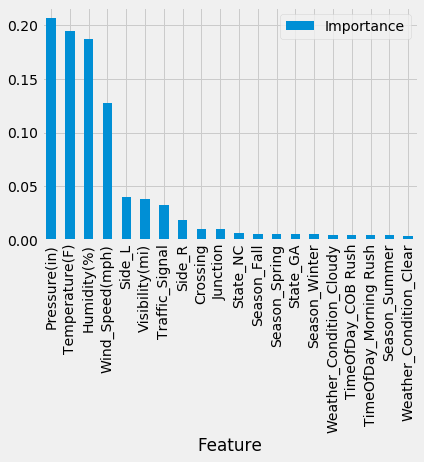

In [81]:
importances_df.head(20).plot(kind="bar")

In [69]:
importances_df_top=importances_df[['Importance','Feature']]

importances_df_top= importances_df[(importances_df.Importance>= 0.004)]


importances_df_top.head()
importances_df_top.plot(kind="bar", figsize=(6,4), align='center', alpha=0.5, color= "#311B92" , fontsize=8)

# Set a title for the chart
plt.title("Accidents per Street Side", fontsize=12)
plt.ylabel('Number of Accidents', fontsize=8)
plt.xlabel('Side', fontsize=8)

plt.show()
plt.tight_layout()

,Importance,Feature
0,0.206541,Pressure(in)
1,0.194329,Temperature(F)
2,0.187085,Humidity(%)
3,0.127875,Wind_Speed(mph)
4,0.040440,Side_L


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [35]:
# # Create the GridSearchCV model
# from sklearn.model_selection import GridSearchCV
# rf_model = RandomForestClassifier()


In [36]:
# rf_param_grid= {'max_depth':[70,150],
#                 'n_estimators':[10,20,50,100,200]}

In [37]:
# rf_grid = GridSearchCV(rf_model, rf_param_grid, verbose=3)
# rf_grid.fit(X_train, np.ravel(y_train,order='C'))
# print("Done!")

### Random Forest

In [38]:
# rf_predictions= rf_grid.predict(X_test)

In [39]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, rf_predictions))

In [40]:
# print(rf_grid.best_params_)
# print(rf_grid.best_score_)

# Save the Model

In [41]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash



# import joblib
# filename = 'rf.sav'
# joblib.dump(rf_grid, filename)

# Train the Model - Logistic Regression

In [39]:
# Set features. This will also be used as your x values.

X = df1.drop(["Severity","Bump", "Turning_Loop","Sunrise_Sunset", "No_Exit", "Zipcode", "County"],axis=1)

y = df1["Severity"].values.reshape(-1, 1)


#removing features did not result in a better score

In [40]:
data = X.copy()
X = pd.get_dummies(data)

#X.to_csv("X.csv",index=False)
#X.head()

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

#X_train.head()

In [42]:
# # Scale your data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
classifier.fit(X_train_minmax, np.ravel(y_train,order='C'))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
print(f"Training Data Score: {classifier.score(X_train_minmax, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_minmax, y_test)}")

Training Data Score: 0.675514353789066
Testing Data Score: 0.6760757191134775


In [46]:
predictions = classifier.predict(X_test_minmax)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [2 2 2 2 3 3 3 2 2 2]
First 10 Actual labels: [[3], [2], [2], [2], [2], [2], [2], [3], [2], [2]]


### Hyper Parameter Tuning

In [146]:
# Create the GridSearchCV model
# from sklearn.model_selection import GridSearchCV
# dt_model = tree.DecisionTreeClassifier()

In [163]:
dt_param_grid = {'max_depth':[10,20], 'min_samples_leaf':[10,20,100]}

In [164]:
dt_grid = GridSearchCV(dt_model, dt_param_grid, verbose=3)
dt_grid.fit(X_train, y_train)
print("Done!")

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_depth=10, min_samples_leaf=10 ...............................
[CV] ... max_depth=10, min_samples_leaf=10, score=0.652, total=   6.9s
[CV] max_depth=10, min_samples_leaf=10 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


[CV] ... max_depth=10, min_samples_leaf=10, score=0.652, total=   6.1s
[CV] max_depth=10, min_samples_leaf=10 ...............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.0s remaining:    0.0s


[CV] ... max_depth=10, min_samples_leaf=10, score=0.652, total=   6.4s
[CV] max_depth=10, min_samples_leaf=10 ...............................
[CV] ... max_depth=10, min_samples_leaf=10, score=0.653, total=   5.6s
[CV] max_depth=10, min_samples_leaf=10 ...............................
[CV] ... max_depth=10, min_samples_leaf=10, score=0.653, total=   6.4s
[CV] max_depth=10, min_samples_leaf=20 ...............................
[CV] ... max_depth=10, min_samples_leaf=20, score=0.652, total=   6.4s
[CV] max_depth=10, min_samples_leaf=20 ...............................
[CV] ... max_depth=10, min_samples_leaf=20, score=0.652, total=   6.3s
[CV] max_depth=10, min_samples_leaf=20 ...............................
[CV] ... max_depth=10, min_samples_leaf=20, score=0.652, total=   6.3s
[CV] max_depth=10, min_samples_leaf=20 ...............................
[CV] ... max_depth=10, min_samples_leaf=20, score=0.653, total=   6.4s
[CV] max_depth=10, min_samples_leaf=20 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.0min finished


Done!


In [165]:
dt_predictions= dt_grid.predict(X_test)

In [166]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_predictions))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00       161
           2       0.66      0.95      0.78    289662
           3       0.48      0.11      0.17    141635
           4       0.00      0.00      0.00     13577

    accuracy                           0.65    445039
   macro avg       0.23      0.21      0.19    445039
weighted avg       0.59      0.65      0.56    445039



In [167]:
print(dt_grid.best_params_)
print(dt_grid.best_score_)

{'max_depth': 10, 'min_samples_leaf': 20}
0.6526511556899915


In [178]:
print(f"Training Data Score: {dt_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {dt_grid.score(X_test, y_test)}")

Training Data Score: 0.6530900685783108
Testing Data Score: 0.6521720568309743
